In [2]:
from nltk import FreqDist
import pyLDAvis 
import pyLDAvis.gensim 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import gensim
import pickle
from gensim import corpora
import spacy
from truncatedSVD import preprocess
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from termcolor import colored
import numpy as np
import pyLDAvis_local
from pyLDAvis_local import gensim_local
pyLDAvis_local.enable_notebook()

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
%matplotlib inline


In [3]:
filename = 'models/finalized_model.sav'
model = pickle.load(open(filename, 'rb'))
nlp = spacy.load("en_core_web_sm")

In [4]:
transcription_list = ["Hi, let's talk about my experience with instacart today. I used instacart because I had a twenty dollar off promo. However, I will use instacart again, items are easy to find everything. I wanted was in stock. My order received quickly and was correct and everything was packaged. Very nicely. Thank you.", "It was very easy to navigate on the app love that they have. Most of the things that I usually buy at Walmart or Target. So it's very convenient for me to use and shows up within a few days. We'll definitely be using this app again.", "All right. First question. How was your experience with instacart went really smooth? Didn't have any problems. Super simple. Just straightforward. Go in, get it, it all with it. Everything came just as the site said, it would no issues with the delivery person, just easier than going and getting it ourselves. On the, how did you navigate the site to find products you added to your cart went in? Looked it all up on the search bar for each of the different things. Found the specific item that we needed the quantity clicked on it and send it to the cart and went and found. The next thing in terms of what frustrations did. And if any didn't have any at all, so just an all-around good experience. We'll do it again. Thanks.", "My Amazon Pantry experience was actually pretty good at I found most of the stuff I needed. The only thing that I guess they're limiting is like Waters, you can't get more than one pack of waters through Amazon pantry. If it were to have, let me get at least three that would have been fine. But other than that, I think I found everything pretty good.", 'It was pretty easy, filter search was really good. I had no frustrations whatsoever.', "Hi, my experience with Instagram was very good. I just but I was like looking for the product in the email and the internet and then I'm by the product in Costco and then send all the information to them to come to my house. I was a very excellent experience. Thank you.", "I shop online at Amazon all the time. I recently bought groceries from Amazon Prime, which I do on a pretty regular basis, because you can get them cheaper than some other places and faster and they deliver it right to your door. I didn't have any problems with Amazon Prime Pantry thisTime, I found everything I was looking for. I was able to order it all at one time and have it delivered. When they said it would, which is pretty normal. I love Amazon, everything about Amazon. They're shipping is good. Their Prime Pantry is good. All other aspects of Amazon is good. I can always find what I need in the pantry and they will ship it to me. Free of charge. Thank you.", "It's Court to order my food online. It's pretty easy to use website. If you go on my end.", 'I had no difficulties using instacart for BevMo. I was able to easily search for the products I wanted and then they were delivered right to my door. All I needed was my ID and they scanned, it dropped off, easy peasy. And that was it.', "I mainly like shopping instacart because I have a bad back and I have somebody else get the items I need for me and they'll even bring them inside the door for me, wearing a mask, which is great. And I like having the ease of shopping online and getting what I need and knowing what time it'll be here.", "Okay, how is my experience? My experience was good? Not excellent. But good. How did I find navigating to the site to find my products? The search bar was clearly defined that part was fine. Some difficulty, finding specific products. I wanted I've come to learn that. Some manufacturers have stopped manufacturing, their Specialty Products. So that affected instacart searches as well. Some products are harder to find. I have to be very Specific, what frustrations did I experience having to be very specific on some items? Some of the items not being found.", 'Amazon. Pantry was great. You got my stuff quick. Ate it all. Thank you.', "The other day, I needed some groceries delivered. Some of my father's home. And I looked on instacart period. He loves BJ's and he specifically likes their deli department. So I went on there and I ordered some of his Deli foods and then I got a few other things that he needed when it was time for The Shopper to shop.I noticed I got everything right away and it took them quite a while to get the two items. They needed in the deli. Overall, they shop pretty quickly. They got me everything that I needed and I was pleased, the only Disappointing thing is the surcharge that instacart charges. It's at least 20 percent more than the price in the store. And that plus is delivery. Charge, plus a tip adds up to quite a lot.", "My experience was super easy. I tried to find a liquor store that would deliver a bottle of champagne to a client and I couldn't. Therefore, I went to instacart and they were able to do so it was quick. It was easy and they delivered it on time.", "My recent experience was in with instacart is actually really good. I was able to get all the groceries that we needed and the delivery was timely and they're always open slots for delivery. So it's not that hard to get her items delivered. We've been using instacart more during this time just because you know, less Worry and anxiety of going to the grocery store. And I guess one downside is that most of the time, some of the items that that we are looking for, is not available, but it's still totally understandable, given given the time, you know, that we are in now, so, I have been, I have, I've been really happy with the experience so far and I think I'll continue using it.", "Amazon Fresh, you guys want to know about Amazon Fresh? Well, I love it. I like it. Especially during a pandemic. It comes in very handy. I navigate through the site so easily, I shop all the time. I shop in the middle of the night. If I remember something I can add it to my list easily. It'll tell me if something is not in stock or not. And I like that, sometimes, it will just reappear, and you're just to re-check, but that's okay. I don't mind. They have products that nobody else really has. Everything is fresh. I got to say everything is so fresh. Rarely my one complaint this sometimes on produce. I'll find like a half a rotten onion or a little bit of the garlic is no good. So sometimes we produce it's a little bit of a problem. But for the most part everything is really fresh. It's wrapped. Okay, some stuffs gets flattened a little bit and if it's something that's really damaged, I can call and complain and they will either replace it or refunds me. So thank you, Amazon Fresh.", 'We heard about instacart through a mutual friend. And during the covid-19 pandemic. We needed some way to deliver groceries to my grandparents. That would be minimal contact. And so, we gave it a try. The first time. We really enjoyed it. So we purchased a subscription and now our whole family uses it.', "My experience with Amazon Pantry was amazing. I'm glad that I'm able to use snap on the computer with delivery, you know, and what's even better is that if with Amazon pantry if you're a Prime member $35 and over you don't need to pay a delivery fee. Thank you guys. Thanks.", "I recently ordered ice tea, and gluten-free cookie mix on Amazon market and the only issue I had was Finding. One the cookies that weren't like a box of six. It was just one or two, so it wasn't really trouble. It was just not spending $30 on a case of six mixes. The iced tea was fine little expensive but whatever can't find it in the market. So, count on Amazon, overall. The experience was fine. No issues. Just searching finding what I wanted. Put it in my cart. Paying shipping, but whatever. No big deal, no real frustrations. Finding what I wanted. Making sure. I wasn't paying additional shipping from, like, an individual seller found everything. I wanted. That was it. Thank you.", "The order I took from Amazon, pantry is really good. Like I said, I couldn't find the product anywhere else, and I was glad to find a little bit more expensive than I had paid before, but no, again. I had a great experience. Thank you.", 'Shopping with instacart was very easy to find the store that I needed and select the items that I wanted, and then having delivery was not difficult. So overall, I would say it was a very good experience and I would definitely use them.', "Hi, my name is Desiree instacart was great. The first order that I did the woman Jennifer replaced everything that they didn't have with better items at a better price. I want, I'm saving $30. She was quick. I put in for the flex delivery and I got it literally. Like I think it was like, um, like want to say like an hour and 15 minutes or so right after very kind the second time that I used it. Also. The gentleman was very nice who's apologizing for something that store didn't have snot as well. But I had a really great experience and that's it. I really appreciate it. Thanks instacart.", "The experience was good. We had some stuff to Shin's that we had to make and they made the right call. I didn't have any stress with the app. It was good. Everything was good. It's easy to navigate.", "So, the first question is, how was my experience using instacart for my Sam's Club order? And I love instacart, and I use it pretty frequently, but this was my first time using it for a Sam's Club order. It was just the usual like easy to browse easy to select things and also to select substitutions and chat. That's one reason why I love instacart and then it was really easy to navigate.8 the site and view the items in my cart because I'm just used to using the app, the frustrations that I had for. The Sam's Club order was, I noticed some of the items that I had picked said, they were in stock on the app and then when my shopper got there, it was out of stock, but it didn't say out of stock on the app. So that was the frustration and then also like the delivery fee was Was a lot more. So I don't know if I'll be using Sam's Club through instacart again, but those were my only two frustrations. Other than that. It was great experience.", "I use instacart quite often. I'm actually overall pretty satisfied with the results. I've been getting with instacart, the Shoppers that I get are usually very good with communicating with me when things are out of stock or a couple of times, I've had to add items and it's super convenient because I have a little one that I don't want to take out into the The open with covid going on. I'm so sorry. So I use Instagram because it's more convenient for me. I love it. A couple of times. I've done the instacart pick up, where I've gone to public, to pick my order up versus having it delivered. And that's just because Publix is right around the corner from me. And sometimes I Is just, is it fits better with my schedule or what have you? And the people who bring my groceries out of always kind.", "My experience shopping with the Amazon Pantry was super. I've found what I was looking for, by just typing in, what products I was looking for. I didn't even have to have a product name. I could just put in snacks, or I can put in paper towels. Plastic silverware. I think those are most of the things that I've looked for lately and it, you know, just would give you a screen, there might be a page or two and you could go through and see what items would fit, what you're looking for. So I place them in my cart and go ahead and pay. And they arrived within a few days. It was really easy and convenient and I probably continue to do a lot of my shopping through the Amazon pantry.", "My experience with Amazon Prime was good. We got a bunch of snacks for the kids like goldfish and B6 another popcorn. So we love you. Papa. It's easy to navigate to the side. All you do is need to go through the Amazon Prime category and Order, $35 or more to get three. Deliveries on all your pantry things and we had no problems either. Either with, getting our food on time. It took two or three days to get it and everything came and decent Condition. Nothing was smashed up. Everything was edible. Yeah, thing was nothing Taste of Bud and that's our feedback. Bye-bye.", "I had a good experience using instacart for Food. Co, I am put it, the some of the items that I wanted specifically other items. I chose based on recommendations. And some things I got that, I wouldn't normally get, but I was able to navigate to the site pretty easily. I didn't have any problems or any questions with using as a card and for food coat.", "I have really enjoyed using instacart. I love that. It's convenient for me to get items where I don't have to leave the house and I can get them right away since I have a premium membership with instacart. So they usually bring my items within two hours of when I order them on the same day. Recently. I used instacart. I believe, on Tuesday of this week. I was kind of feeling a little ill. So it was veryConvenient for me to have someone to bring the groceries to me instead of me having to go out when I wasn't feeling well and there was also an item that I forgot to add to my card. So I had to ease of actually being able to add on an item by chatting with my insta Shopper and my insta Shopper was able to get everything that I needed. Was he brought things to me within Maybe? A little bit over an hour and a half. After I ordered them and everything. I needed, including the item that I had to edit the last minute. So I've had a favorable experience with them and I would recommend them to anyone.", "My experience through cub, and the instacart was very good. I needed to purchase some items for my father and mother through the site because we're not allowed to see them right now due to the quarantine there at an assisted living facility. So it was a good experience. I found everything that I needed. There were there were a couple items that I was not able to find but to navigate I just use the search function and search forThe thing that I know that my mom and dad love, they especially crazy really wanted hard-boiled eggs. So I searched for the hard-boiled eggs and then my dad wanted some meat sticks that had to be supplemented with a different kind that I wanted to do. It was a ham steaks. I wanted him sticks and they ended up changing that to beef sticks, which was fine with me that. So that was basically the only Duration that I had was the certain items that I wanted were not there, but they did substitute it caramel rolls. They didn't have the caramel rolls. They ended up substituting that for another frosted type of role, but all in all it was a good experience. I didn't come across any problems just besides certain items not being there. The Shopper was very friendly, very easy and happy to help me with any questions. I had or any problems. And she kept Me notified, Whenever there was a change in product. So that was nice. And she did go out of her way to help me find a card to add to the package. So that my mom and dad knew who it was from and that it was to help them feel better about not being able to be with family. But yeah, that's about it. I don't think there was anything else. It was a good experience, all in all and I would do it again. I would use them again.", "Hi, this is a review of instacart for, from picking up from fresh. Thyme. The ordering was fairly easy. I could find what I wanted about complaints, not really complained. But obviously, the prices are more expensive on their, the fees. Like when you add everything together, especially during covid. I was paying like 20 to 30 extra dollars by theHi my tip to people which is fine because I was tipping them and I appreciate their going into stuff but that and then not receiving receipts. I actually use apps to make money from receipt. So it is good. If I can have the paper receipt, even if it's not the same price as my regular one. Because I understand that they have to make money somehow but those are the main two things. Finding stuff on the app was easy. The Murray was easy, the lady who just dropped them off, was super nice offered. No touch, which was great. So no real complaints, just things are more expensive when you order on instacart and the fees are not so fun. But you have to weigh it. Do you want to go in store or by someone else?", "So, for my most recent order on Peapod, okay, overall, it was an okay experience. I was able to accomplish what I needed to. I was able to get a delivery written window that in a few days, which is Improvement, because in Prior weeks, prior months it's taken two weeks just to get a delivery window. A lot of things sell out in that two-week period. I was able to get a lot of things that I needed. There were still some things that were unavailable like,Toilet paper and paper towels and disinfecting wipes things that are kind of critical in assessing these right now, but I was able to get kind of Basics like eggs and milk and orange juice that sort of thing. My, I mainly navigate the site by just going to my past purchases or specials and seeing what's either on sale for the week, or what things have purchased in the past. I need to reorder occasionally. I'll I'll search by the navigation, butAnd often, I usually also will use a search word from looking for something specifically. And then one frustration was just you know delivery of scent of fragile products. So my eggs, I would have two dozen eggs. They arrived in a regular plastic shopping bag on their side, bumping up against all the other groceries. So naturally, they arrived damaged and there was like, no special care taken by Peapod to deliver the eggs carefully. I order from Amazon Prime and they this was a challenge for them for a long time, too, and they recently, We started to put eggs in a carton special cartons, that keep them keeping them upright, and they deliver them hand them to you separately, from the rest of the bags. And I think Peapod still has some work to do in that area. Thanks.", "My experience with Amazon. Pantry, the kids, love the food. I'm able to use my food stamp card. It's definitely easy to get through and really easy to select your choices you want and I like it most because I can use my food stamp card on there. So, yeah.", "My experience with Amazon. Pantry, the kids, love the food. I'm able to use my food stamp card. It's definitely easy to get through and really easy to select your choices you want and I like it most because I can use my food stamp card on there. So, yeah.", "Well, I am an avid Amazon Shopper. So, I'm on the site almost daily. I don't purchase daily. But I like to go there just to see what they have and put things in my list, so that I can prioritize and buy things that I want when I can afford them. So shopping for the items that I wanted was easy. I just kind of do a search and items quickly came up and I put them in my basket, so I did not have any Trouble. Finding the things I want. I think that is about it.", "So as far as my experience shopping recently with Amazon Prime Pantry, I guess I'd say I was neutral on it. I've used Prime Pantry several times in the past. So it's not something new to me. I use Amazon a lot. So shopping on it. Navigating the site adding products to the cart. That's easy. And right now, a lot of items are out of stock and not available several times. I would add something to my cart. And by the time I would have my cart ready to check out items would be sold out. And then I'd have to go back and search again for other items. Because when you spend $35, then you get the free shipping. So then I wanted to make sure I had free shipping in addition. And the shipping with Amazon is slow, right now needs to be expected, shipping slow everywhere, but it's just not something. I'm used to waiting three weeks for a package from Amazon, but I like the fact that I don't have to leave the house and everything is sent here. So, I can't say I'm totally upset about it because I like the convenience factor. Just a little disappointed.", "So, I deliver came on time. Last week when I had Amazon Fresh. They put my ice cream it with some water bottles here as one of them. The problem is ice cream melted, but it's ice cream, but everything else was fine. What else? Yeah, everything was fine, and it was nicely placed at my doorstep, like not in the way the actual door. Either. So that was nice of him to do for me.", "So, I like using instacart for micro. She needs. It's wonderful sight. Aldi is pretty far from where I live and instacart allows me to shop. One from Aldi without having to leave my house. So did navigation wasn't an issue. The only issue I do have with instacart. Is that the crisis differ?Then store. So when I get my receipt, I would notice that my groceries are a dollar or two cheaper than it was listed on instacart.", "Used Amazon. Pantry actually for the first time not too long ago. I've used Amazon for many many times for many years. This is the first time with Amazon pantry and I thought the overall experience was pretty good. There were site navigation because I would was trying to fulfill the 35 dollar minimum order. I would look at it put stuff in my cart and then go away and come back again. And when I did that it would constantly reset it to just Amazon versus Amazon pantry. So that was a little frustrating to keep needing to click on Amazon, the Amazon, Pantry section to look but not a major issue. I think another frustration with it was It was kind of limited on the different products that were there. I was looking for specific a few specific things. And they did not have it in the Amazon, Pantry section of Amazon. Other than that, yeah, I think the experience rules fairly good. Few minor frustrations. But other than that, good.", 'So my experience is pretty good. Navigating was pretty easy for the most part. And I guess the only Annoying Thing was that they charge more for the products through instacart than they do at Costco. So this like kind of an inflation going on. So that was like, maybe the worst part.', 'My experience with Amazon shopping was pretty good. It was pretty easy to navigate. It was easy to add things to my cart. I had a delay in my shipment because I had Train derailed somewhere up north and it took two extra days. But other than that, I got everything else on time.', "Hi, we were just discussing dinner and we had a really nice breakfast sausage and pancakes, and things like that. Something different from what we normally get. Everything's going. Well. The weather is nice and warm, clear supposed to get a lot of snow. Well, not snow, butRain here. Probably very soon. It is almost Fourth of July weekend. And then that will be the beginning of our monsoon season here in New Mexico. Everything is going well and discussing what to do with our yard. We've got quite a bit going on in the yard. It is pretty pretty nice out there quite a bit of greenery and enjoying that like the weather. Well, it was nice talking with you. I'll talk to you later. Bye.", 'I had a great experience with instacart. No problems with the website. Everything worked out good. No complaints.', "My experience with Amazon Pantry was great. Basically how I did the navigated, the site. I just Was sorting the products from low price, too high price in each category and figuring out what I wanted from there. I have a family of five and my three children are out of school, so they're eating a lot, but I really didn't have any trouble, so it was excellent.", 'Using Costco app to order groceries with so easy. I put in the search bar, what I wanted and I found them. I found tangerines and I found carries and even found Pantene shampoo and conditioner. I had to add them at the end because I closed on my order and it was so easy. The person delivered a right to myhouse right to the my door. I really enjoy using. It Costco is great.', "Amazon. Pantry is nice to use of. You can use the search field. There's three different categories to go find the food that you're looking for fresh Pantry or prime. The most frustrating thing about it is you have to meet a minimum requirement in each category to get free delivery. You can't buy one thing out of each category and hope it adds together to give you free delivery and don't work that way. That's the most frustrating thing. Otherwise Amazon pantry is really good to use. Yes.", "Amazon. Amazon pantry is great. It takes food stamps, takes, you know, your bank card. I had no problems. No issues. There are special deals every day that you can try. If you see something that you like, definitely get it when you can, because sometimes they don't have it the next time.", "So compared to taking this video, which has to be under 100 megabytes long. The Amazon experience was very nice. That price was too high. But the packaging was good. They put the twelve packs into another box to keep them from being damaged. They actually delivered to our house this time, which is not the norm for Amazon. Normally, they delivered to a neighbor's house or tell me that's lost in the mail, and it gets delivered another time. So overall, decent experience", "My experience was okay, except for fresh produce their either come like molded or completely, not even ripe. The site was the was the site easy to navigate. Yes, but I've noticed that not even half of what they offer at the stores, even on the site. And do I have any up, frustrations? I guess my frustrations are just the produce. It's very hit-or-miss. Yeah.", "My experience was great. I found everything I needed to find and it was actually pretty cool. They even tell you options of what substitute just in case. They don't have items that you need. The only thing that frustrates me is that the extra cost like for example of my total was $20. I would have to pay like like maybe $50 just for the whole order. That was the only thing that frustrates me. Everything else is great experience. I love it.", "My experience with Amazon Pantry was a good experience. I got chips cereal pretzels. Some paper plates trying to remember what else can't necessarily remember, but it was a very good experience. Everything came as ordered in a wonderfully sealed box.", "Hi, I've been using Instagram for almost two years in general, really? Really like them. They are usually very prompt. It makes everyday life, super convenient and easy with the kids and being a working mom and all that good stuff. But sometimes you delivery you order things and they're not delivered in the time frame that they say they will be. So that is a little bit inconvenient when you're trying to plan for people to come over and event or something. And then you're Delirious hours hours late, sometimes or early. Sometimes it'll come early and you're not there and your groceries are sitting out in the sun. I've had Happened before, but instacart is always super, super good about handling stuff like that. I have had items missing from orders. I've had extra items added to my orders and they will always refund it and make it right. No. Hassle. Covid has put a bit of a glitch. I guess. It's been much harder to use and the delivery times aren't is guaranteed, but in general, it's pretty good. I'd say people do really well, most of the time. I'm sometimes they don't find products even though you know, they're in the stores and then sometimes, they don't pick good quality produce. Those are probably my biggest qualms that I try and put notes in there. Like, you know, check for Quality first or uses few bags as possible. Because you still do get charged for grocery bags through instacart, which is a bummer because I bring my own bags on a shop on my own. Also. I lost the train of thought. Anyway, overall love instacart. I've been using them for two years. I'll continue to use them. I recommend them to friends very convenient, but there are some drawbacks that seemed seems like pretty easy fixes.", 'Using Amazon, Pantry was very easy to use. I just uploaded my method of payment search for eligible items and it took me right to it. I will be using it again item ship fast and right to my front door. It was very effortless. I recommend using, especially during this pandemic. So, if you wanted to keep your distance from people, I recommend using eBay Pantry. Thank you.', "My Amazon Pantry experience was very good. I found the items. I wanted by using the search bar, and I navigate to The Pantry by using Amazon app, clicking on the menu. And then clicking Pantry. I had no frustrations. No problems. It was great. I enjoy it. It's convenient. Thank you.", "Okay, how was my experience? Um, pretty straightforward, pretty easy. It's usually the same protocol. Most of the time when I use the app this time it overall was only slightly difficult, but to be perfectly honest. I only need a few items to complete my order. How did you navigate the site and find the products you added to your cart? Most of the time? I do searches through the search bar, sometimes since I've used the app so much. It knows the kind of things. I'm into a purchasing. So, it'll give me suggestions Auto remind me of things like purchased before and I'll just go ahead and put them in the cart, but for the majority of the items that I purchased on this particular trip, I did do specific searches. What First Nations did I have? If any the main frustration I had this is due to the covid-19. Pandemic is I was unable to get certain items. So I had to substitute like different crackers, and snacks, and so on and so forth. My butter product had switched and there was some noodles that I couldn't quite get. So my purchaser, my buyer substituted. My brand for smaller, lunch version. Other than that, the first relations were minuscule and very small. And the person who bought my groceries was very helpful."]

### Top topics from the topic modelling 

In [5]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

tokenized_reviews = []
for t in transcription_list:
    tokenized_review = t.split()
    tokenized_reviews.append(tokenized_review)

reviews = lemmatization(tokenized_reviews)

dictionary = corpora.Dictionary(reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

# print(lda_model.print_topics())

In [6]:
vis = pyLDAvis_local.gensim_local.prepare(lda_model, doc_term_matrix, dictionary)

In [7]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.032664  0.008984       1        1  26.548581
2      0.139489  0.003742       2        1  24.899111
4      0.068662 -0.037158       3        1  19.111011
5      0.029021  0.093544       4        1  14.286049
3     -0.048330 -0.138273       5        1   9.672038
1     -0.123774  0.034647       6        1   3.078170
6     -0.097733  0.034514       7        1   2.405040, topic_info=           Term      Freq      Total Category  logprob  loglift
5          item  31.00000  31.000000  Default  30.0000  30.0000
69         food   9.00000   9.000000  Default  29.0000  29.0000
46       pantry  13.00000  13.000000  Default  28.0000  28.0000
167        nice   5.00000   5.000000  Default  27.0000  27.0000
40         fine   5.00000   5.000000  Default  26.0000  26.0000
..          ...       ...        ...      ...      ...      ...
11          app   0.05051  10.501725   Topic7  -6.3687  -1.6095
3    experience   0.05051  38.155712   Topic7  -6.3687  -2.8997
8         stock   0.05051   6.310755   Topic7  -6.3687  -1.1002
28      product   0.05051  16.543541   Topic7  -6.3687  -2.0640
181        kind   0.05051   3.819480   Topic7  -6.3687  -0.5981

[391 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
10        2  0.963275    Most
55        1  0.232936    able
55        3  0.232936    able
55        4  0.310581    able
55        5  0.232936    able
...     ...       ...     ...
95        3  0.686833   while
284       5  0.492456  window
285       5  0.742439    word
286       5  0.742439    work
335       6  0.675439    yard

[405 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 6, 4, 2, 7])

### Top frequent words

In [9]:
def freq_words(transcription_list, terms = 20):

    clean_text = []

    for t in transcription_list:
        clean_t = preprocess(t)
        clean_text.append(clean_t)

    all_words = ' '.join([text for text in clean_text]) 
    all_words = all_words.split()
    fdist = FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()),   
             'count':list(fdist.values())}) 
    d = words_df.nlargest(columns="count", n = terms)	    
    plt.figure(figsize=(20,5)) 
    ax = sns.barplot(data=d, x= "word", y = "count") 
    ax.set(ylabel = 'Count')
    plt.show()

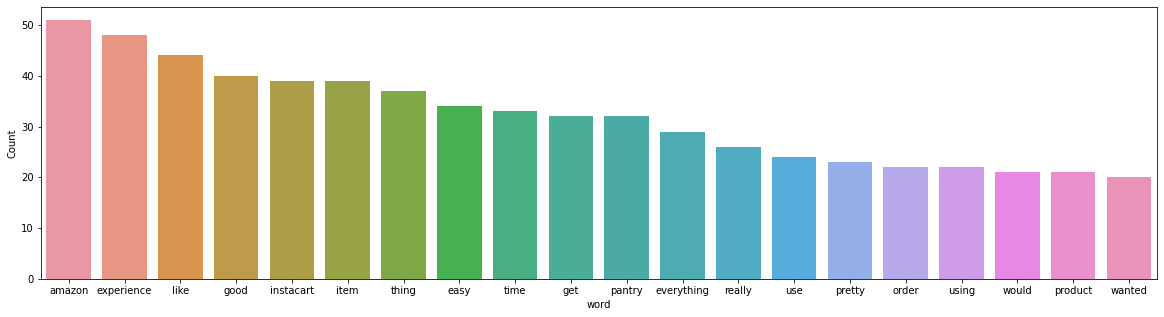

In [10]:
freq_words(transcription_list)

(-0.5, 399.5, 199.5, -0.5)

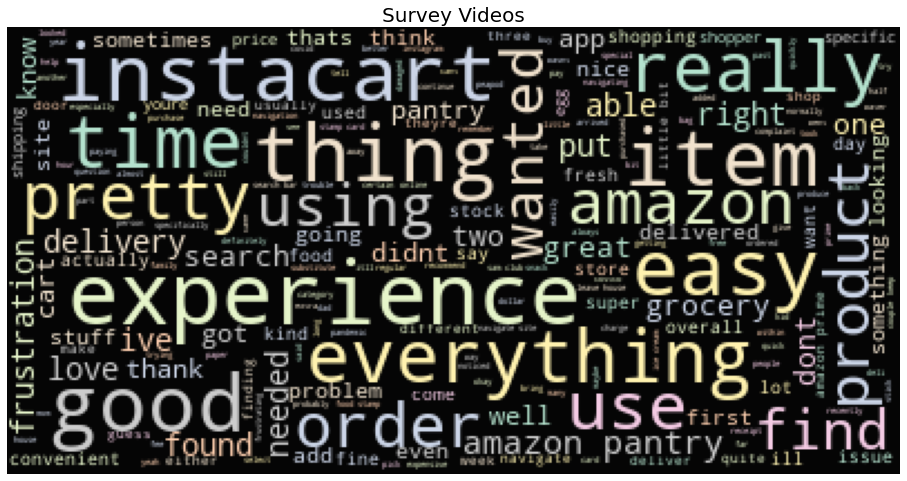

In [11]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 40)

final_text = ''
for transcription in transcription_list:
    final_text+= transcription+"."

final_text = preprocess(final_text)
hpl = [final_text]

wc.generate(" ".join(hpl))
plt.title("Survey Videos", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

In [12]:
def get_sentiments(text):
    blob = TextBlob(text)
    overal_sentiment = blob.sentiment.polarity

    sentences_sentiment = []

    for sentence in blob.sentences:
        sentence_str = str(sentence)
        textblob_sentiment = TextBlob(sentence_str).sentiment.polarity
        obj = {"sentence":sentence_str,"sentiment":textblob_sentiment}
        sentences_sentiment.append(obj)

    return overal_sentiment, sentences_sentiment

def get_emotions(text):
    overal_emotion = model.predict([text])[0]

    sentences_emotion = []
    blob = TextBlob(text)

    for sentence in blob.sentences:
        sentence_str = str(sentence)
        emotion = model.predict([sentence_str])[0]
        obj = {"sentence":sentence_str,"emotion":emotion}
        sentences_emotion.append(obj)

    return overal_emotion, sentences_emotion

def get_ner(text):

    doc = nlp(text)

    ner_list = []
    for ent in doc.ents:
        text_obj = {}
        text_obj['token'] = ent.text
        text_obj['ner'] = ent.label_
        text_obj['desc'] = str(spacy.explain(ent.label_))

        ner_list.append(text_obj)

    return ner_list


### Top positive/negative sentences

In [13]:
columns =['Video', 'Sentence', 'Score']
sentence_sentiment_df = pd.DataFrame(columns= columns)

for idx,transcription in enumerate(transcription_list,1):
    overal_sentiment, sentences_sentiment = get_sentiments(transcription)
    for sentence in sentences_sentiment:
        sentence_sentiment_df.loc[len(sentence_sentiment_df.index)] = ['Video'+str(idx), sentence['sentence'],sentence['sentiment']] 

In [14]:
print("Top positive sentences")
top_positive_sentences_df = sentence_sentiment_df.sort_values('Score',ascending = False)
top_positive_sentences_df.head(10)

Top positive sentences


,Video,Sentence,Score
435,Video51,Everything came as ordered in a wonderfully sealed box.,1.00
331,Video38,It's wonderful sight.,1.00
34,Video6,I was a very excellent experience.,1.00
32,Video6,"Hi, my experience with Instagram was very good.",0.91
470,Video54,My Amazon Pantry experience was very good.,0.91
231,Video30,"My experience through cub, and the instacart was very good.",0.91
71,Video12,Pantry was great.,0.80
152,Video22,"Hi, my name is Desiree instacart was great.",0.80
148,Video20,I had a great experience.,0.80
177,Video24,It was great experience.,0.80


In [15]:
print("Top negative sentences")
top_negative_sentences_df = sentence_sentiment_df.sort_values('Score',ascending = True)
top_negative_sentences_df.head(10)

Top negative sentences


,Video,Sentence,Score
356,Video40,"So that was like, maybe the worst part.",-1.000000
181,Video25,I'm so sorry.,-0.500000
59,Video11,Not excellent.,-0.500000
320,Video36,Just a little disappointed.,-0.468750
441,Video52,So that is a little bit inconvenient when you're trying to plan for people to come over and event or something.,-0.393750
92,Video15,So it's not that hard to get her items delivered.,-0.291667
278,Video32,"I'll I'll search by the navigation, butAnd often, I usually also will use a search word from looking for something specifically.",-0.250000
110,Video16,I'll find like a half a rotten onion or a little bit of the garlic is no good.,-0.234722
345,Video39,"So that was a little frustrating to keep needing to click on Amazon, the Amazon, Pantry section to look but not a major issue.",-0.206250
445,Video52,I have had items missing from orders.,-0.200000


In [16]:
def print_text(overal_sentiment, sentences_sentiment):
    if overal_sentiment>0.1:
        t = colored("Positive",'green',attrs=['bold'])
    elif overal_sentiment<(-0.1):
        t = colored("Negative",'red',attrs=['bold'])
    else:
        t = "Neutral"

    print("Overal Sentiment = ", t)
    for s in sentences_sentiment:
        if s['sentiment']>0.1:
            t = colored(s['sentence'],'green',attrs=['bold'])
        elif s['sentiment']<(-0.1):
            t = colored(s['sentence'],'red',attrs=['bold'])
        else:
            t = s['sentence']
        print(t, end = '')

In [17]:
def print_video_result(transcription_list):
    for idx,transcription in enumerate(transcription_list,1):
        print("Video",idx)
        overal_sentiment, sentences_sentiment = get_sentiments(transcription)
        print_text(overal_sentiment,sentences_sentiment)
        print()
        print("*"*100)


In [18]:
print_video_result(transcription_list[:5])

Video 1
Overal Sentiment =  Positive
Hi, let's talk about my experience with instacart today.I used instacart because I had a twenty dollar off promo.However, I will use instacart again, items are easy to find everything.I wanted was in stock.My order received quickly and was correct and everything was packaged.Very nicely.Thank you.
****************************************************************************************************
Video 2
Overal Sentiment =  Positive
It was very easy to navigate on the app love that they have.Most of the things that I usually buy at Walmart or Target.So it's very convenient for me to use and shows up within a few days.We'll definitely be using this app again.
****************************************************************************************************
Video 3
Overal Sentiment =  Positive
All right.First question.How was your experience with instacart went really smooth?Didn't have any problems.Super simple.Just straightforward.Go in, get it, i

## Search

In [19]:
def search(text):
    search_df = sentence_sentiment_df.loc[sentence_sentiment_df['Sentence'].str.contains(text, case=False)]
    return search_df

In [20]:
search_text = 'prime'
search(search_text)

,Video,Sentence,Score
37,Video7,"I recently bought groceries from Amazon Prime, which I do on a pretty regular basis, because you can get them cheaper than some other places and faster and they deliver it right to your door.",0.082143
38,Video7,"I didn't have any problems with Amazon Prime Pantry thisTime, I found everything I was looking for.",0.000000
43,Video7,Their Prime Pantry is good.,0.700000
125,Video18,"I'm glad that I'm able to use snap on the computer with delivery, you know, and what's even better is that if with Amazon pantry if you're a Prime member $35 and over you don't need to pay a delivery fee.",0.500000
198,Video27,My experience with Amazon Prime was good.,0.700000
203,Video27,"All you do is need to go through the Amazon Prime category and Order, $35 or more to get three.",0.500000
283,Video32,"I order from Amazon Prime and they this was a challenge for them for a long time, too, and they recently, We started to put eggs in a carton special cartons, that keep them keeping them upright, and they deliver them hand them to you separately, from the rest of the bags.",0.102381
304,Video36,"So as far as my experience shopping recently with Amazon Prime Pantry, I guess I'd say I was neutral on it.",0.050000
305,Video36,I've used Prime Pantry several times in the past.,-0.125000
395,Video46,There's three different categories to go find the food that you're looking for fresh Pantry or prime.,0.150000


### Named Entities 

In [21]:
columns =['Video', 'Token','NER','Description']
ner_df = pd.DataFrame(columns= columns)

for idx,transcription in enumerate(transcription_list,1):
    ner_list = get_ner(transcription)
    
    for ner in ner_list:
        ner_df.loc[len(ner_df.index)] = ['Video'+str(idx), ner['token'],ner['ner'],ner['desc']] 
ner_df

,Video,Token,NER,Description
0,Video1,today,DATE,Absolute or relative dates or periods
1,Video1,twenty dollar,MONEY,"Monetary values, including unit"
2,Video2,Walmart or Target,ORG,"Companies, agencies, institutions, etc."
3,Video2,a few days,DATE,Absolute or relative dates or periods
4,Video3,First,ORDINAL,"""first"", ""second"", etc."
...,...,...,...,...
157,Video53,eBay Pantry,ORG,"Companies, agencies, institutions, etc."
158,Video54,Amazon Pantry,ORG,"Companies, agencies, institutions, etc."
159,Video54,Amazon,ORG,"Companies, agencies, institutions, etc."
160,Video55,covid-19,PERSON,"People, including fictional"


In [22]:
item_counts = ner_df["NER"].value_counts()
print(item_counts)

ORG         74
CARDINAL    26
DATE        21
PERSON      12
ORDINAL     10
MONEY        9
TIME         5
GPE          3
PERCENT      1
QUANTITY     1
Name: NER, dtype: int64


In [26]:
groups = ner_df.groupby(['NER'])
groups

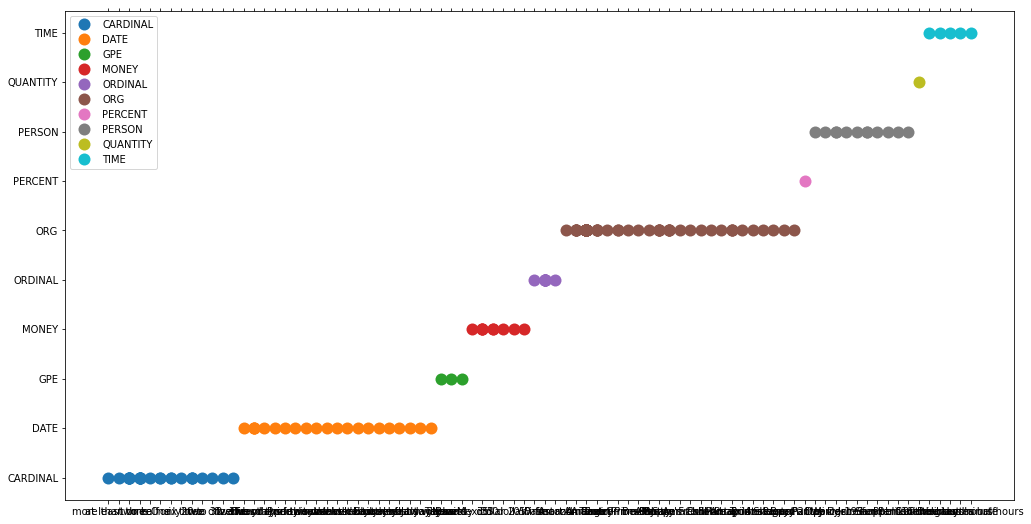

In [28]:
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.Token, group.NER, marker='o', linestyle='', ms=12, 
            label=name,
#             color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)
   
plt.show()


### Aspect based sentiment

In [29]:
from typing import Callable
from typing import List

from aspect_based_sentiment_analysis.aux_models import ReferenceRecognizer
from aspect_based_sentiment_analysis.aux_models import PatternRecognizer
from aspect_based_sentiment_analysis.pipelines import Pipeline
from aspect_based_sentiment_analysis.professors import Professor

import aspect_based_sentiment_analysis as absa

from aspect_based_sentiment_analysis.models import BertABSCConfig
from aspect_based_sentiment_analysis.models import BertABSClassifier
import transformers

In [30]:
def load(name: str = 'classifier-rest-0.2',text_splitter: Callable[[str], List[str]] = None,
            reference_recognizer: ReferenceRecognizer = None,
            pattern_recognizer: PatternRecognizer = None,
            **model_kwargs
        ) -> Pipeline:
    """ Load ready to use pipelines. Files are stored on
    the HaggingFace AWS S3. """
    try:
        config = BertABSCConfig.from_pretrained(name, **model_kwargs)
        model = BertABSClassifier.from_pretrained(name,config=config)
        tokenizer = transformers.BertTokenizer.from_pretrained(name)
        professor = Professor(reference_recognizer, pattern_recognizer)
        nlp = Pipeline(model, tokenizer, professor, text_splitter)
        return nlp

    except EnvironmentError as error:
        text = 'Model or Tokenizer not found. Please check a documentation.'
#         logger.error(text)
        print(error)
        raise error

In [31]:
recognizer = absa.aux_models.BasicPatternRecognizer()
nlp_ab = load("classifier-rest-0.2", pattern_recognizer=recognizer)

Some layers from the model checkpoint at classifier-rest-0.2 were not used when initializing BertABSClassifier: ['dropout_379']
- This IS expected if you are initializing BertABSClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertABSClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of BertABSClassifier were not initialized from the model checkpoint at classifier-rest-0.2 and are newly initialized: ['dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
transcription = transcription_list[1]
print(transcription)
ner_list = get_ner(transcription)
ner_list

It was very easy to navigate on the app love that they have. Most of the things that I usually buy at Walmart or Target. So it's very convenient for me to use and shows up within a few days. We'll definitely be using this app again.


[{'token': 'Walmart or Target',
  'ner': 'ORG',
  'desc': 'Companies, agencies, institutions, etc.'},
 {'token': 'a few days',
  'ner': 'DATE',
  'desc': 'Absolute or relative dates or periods'}]

In [33]:
aspects = ['Walmart','Target']
completed_task = nlp_ab(text=transcription, aspects=aspects)
examples = list(completed_task.examples)

In [34]:
final_aspects = []
final_sentiments = []

for idx,example in enumerate(examples):

    aspect_dict = {}
    sentiment_dict = {}

    rounded_scores = np.round(example.scores, decimals=3)
    max_index = np.argmax(rounded_scores)

    if max_index == 0:
        sentiment = "Peutral"
    elif max_index == 1:
        sentiment = "Negative"
    else:
        sentiment = "Positive"

    scores = {"neutral":str(rounded_scores[0]),"negative":str(rounded_scores[1]),"positive":str(rounded_scores[2])}

    aspect_dict[aspects[idx]] = str(scores)
    sentiment_dict[aspects[idx]] = sentiment

    final_aspects.append(aspect_dict)
    final_sentiments.append(sentiment_dict)

In [35]:
final_aspects

[{'Walmart': "{'neutral': '0.436', 'negative': '0.024', 'positive': '0.541'}"},
 {'Target': "{'neutral': '0.415', 'negative': '0.024', 'positive': '0.561'}"}]

In [36]:
final_sentiments

[{'Walmart': 'Positive'}, {'Target': 'Positive'}]

## Clustering for the surveys

In [37]:
# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
from branca.element import Figure

In [38]:
columns =['Video', 'Transcript']
transcript_df = pd.DataFrame(columns= columns)

for idx,transcription in enumerate(transcription_list,1):
    transcript_df.loc[len(transcript_df.index)] = ['Video'+str(idx), transcription] 

In [39]:
transcript_df.head()

,Video,Transcript
0,Video1,"Hi, let's talk about my experience with instacart today. I used instacart because I had a twenty dollar off promo. However, I will use instacart again, items are easy to find everything. I wanted was in stock. My order received quickly and was correct and everything was packaged. Very nicely. Thank you."
1,Video2,It was very easy to navigate on the app love that they have. Most of the things that I usually buy at Walmart or Target. So it's very convenient for me to use and shows up within a few days. We'll definitely be using this app again.
2,Video3,"All right. First question. How was your experience with instacart went really smooth? Didn't have any problems. Super simple. Just straightforward. Go in, get it, it all with it. Everything came just as the site said, it would no issues with the delivery person, just easier than going and getting it ourselves. On the, how did you navigate the site to find products you added to your cart went in? Looked it all up on the search bar for each of the different things. Found the specific item that we needed the quantity clicked on it and send it to the cart and went and found. The next thing in terms of what frustrations did. And if any didn't have any at all, so just an all-around good experience. We'll do it again. Thanks."
3,Video4,"My Amazon Pantry experience was actually pretty good at I found most of the stuff I needed. The only thing that I guess they're limiting is like Waters, you can't get more than one pack of waters through Amazon pantry. If it were to have, let me get at least three that would have been fine. But other than that, I think I found everything pretty good."
4,Video5,"It was pretty easy, filter search was really good. I had no frustrations whatsoever."


In [40]:
corpus = transcript_df['Transcript'].tolist()
corpus[18]

"I recently ordered ice tea, and gluten-free cookie mix on Amazon market and the only issue I had was Finding. One the cookies that weren't like a box of six. It was just one or two, so it wasn't really trouble. It was just not spending $30 on a case of six mixes. The iced tea was fine little expensive but whatever can't find it in the market. So, count on Amazon, overall. The experience was fine. No issues. Just searching finding what I wanted. Put it in my cart. Paying shipping, but whatever. No big deal, no real frustrations. Finding what I wanted. Making sure. I wasn't paying additional shipping from, like, an individual seller found everything. I wanted. That was it. Thank you."

In [41]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [42]:
language = 'english'
corpus = processCorpus(corpus, language)
corpus[18]

"recent order ice tea gluten-fre cooki mix amazon market issu find one cooki n't like box six one two n't realli troubl spend case six mix ice tea fine littl expens whatev n't find market count amazon overal experi fine issu search find want put cart pay ship whatev big deal real frustrat find want make sure n't pay addit ship like individu seller found everyth want thank"

In [43]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf
final_df.head()

,abl,accomplish,across,actual,ad,add,addit,affect,afford,ago,...,work,worri,worst,would,wrap,written,yard,yeah,year,yes
0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.1348,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.088899,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.152999,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.126588,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)[0]

instacart    0.346722
correct      0.258847
howev        0.258847
promo        0.258847
today        0.258847
Name: 0, dtype: float64

# K-Means

##### Function that runs the K-Means algorithm *max_k* times and returns a dictionary of each k result

In [45]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

#### Silhouette Score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)..

In [46]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [47]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

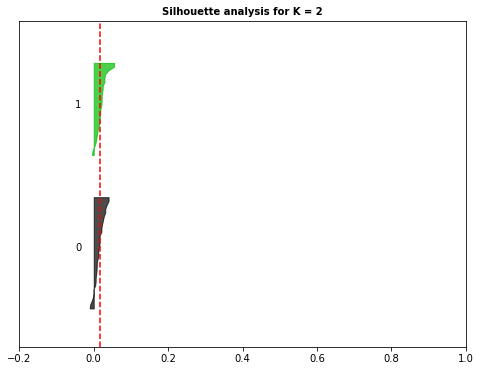

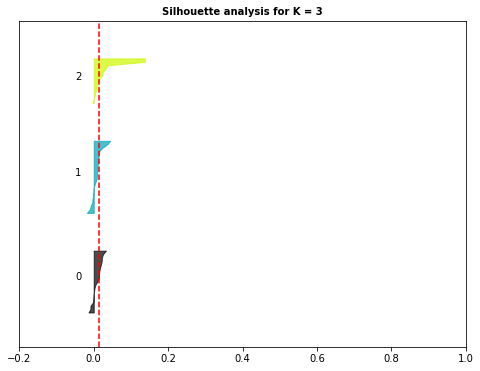

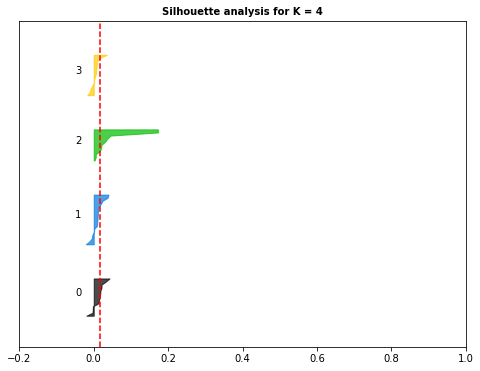

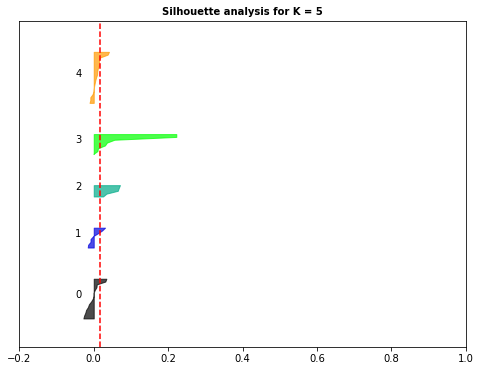

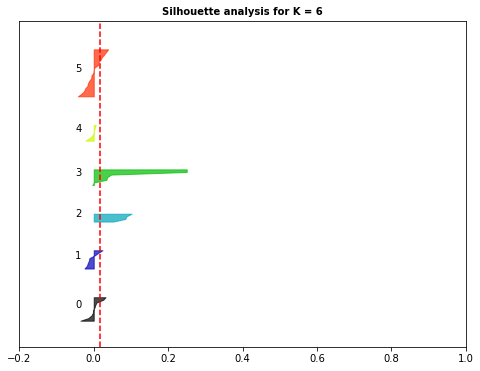

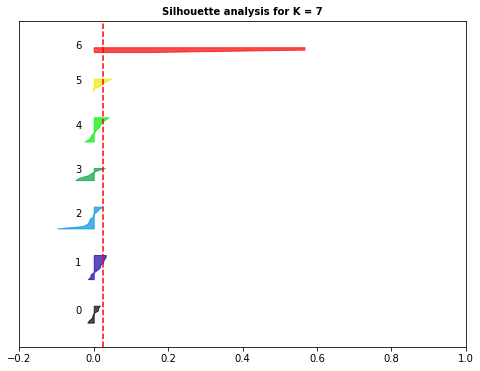

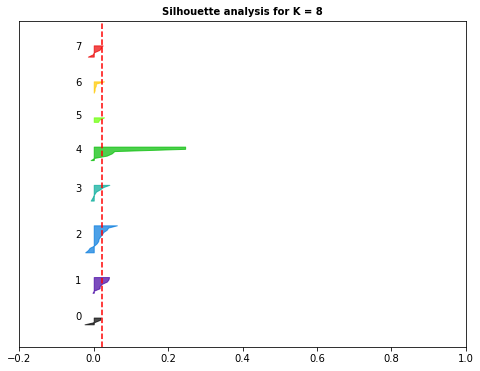

In [48]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

### Cluster Analysis

Now we can choose the best number of K and take a deeper look at each cluster. Looking at the plots above, we have some clues that when K = 5 is when the clusters are best defined. So first we will use a simple histogram to look at the most dominant words in each cluster:

In [49]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

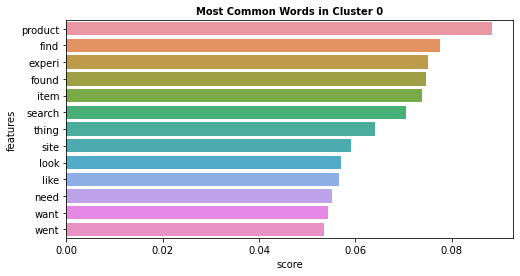

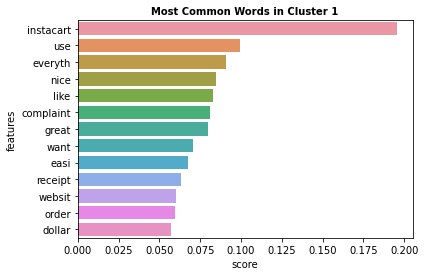

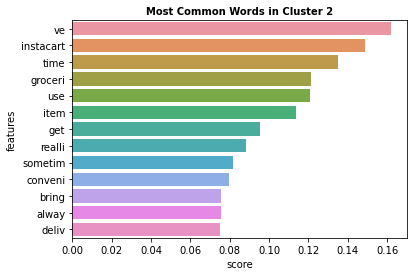

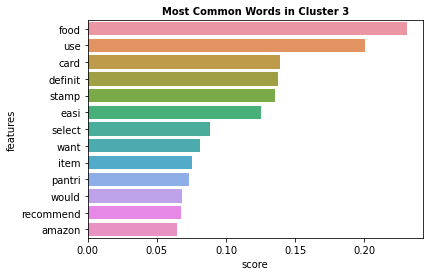

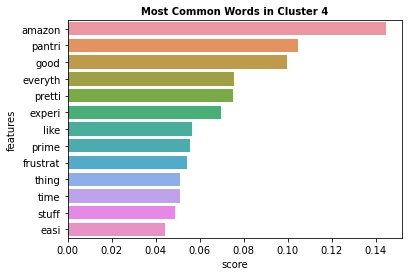

In [50]:
best_result = 5
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

#### Map of Words

Now that we can look at the graphs above and see the best scored words in each cluster, it's also interesting to make it prettier by making a map of words of each cluster!

In [51]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

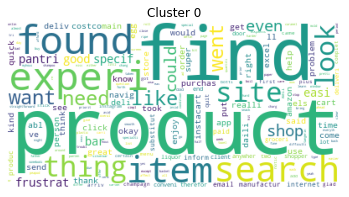

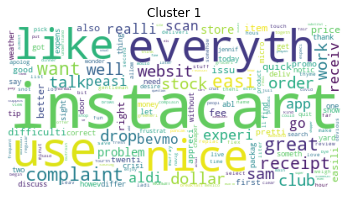

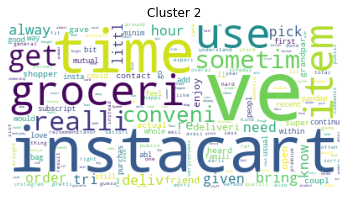

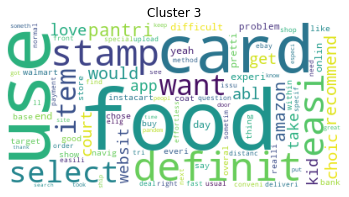

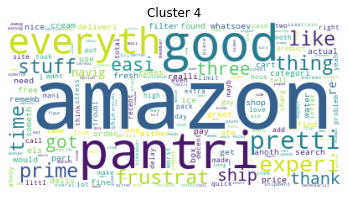

In [52]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [53]:
# Assigning the cluster labels to each country
labels = kmeans.labels_ 
transcript_df['cluster'] = labels
transcript_df.head()

,Video,Transcript,cluster
0,Video1,"Hi, let's talk about my experience with instacart today. I used instacart because I had a twenty dollar off promo. However, I will use instacart again, items are easy to find everything. I wanted was in stock. My order received quickly and was correct and everything was packaged. Very nicely. Thank you.",1
1,Video2,It was very easy to navigate on the app love that they have. Most of the things that I usually buy at Walmart or Target. So it's very convenient for me to use and shows up within a few days. We'll definitely be using this app again.,3
2,Video3,"All right. First question. How was your experience with instacart went really smooth? Didn't have any problems. Super simple. Just straightforward. Go in, get it, it all with it. Everything came just as the site said, it would no issues with the delivery person, just easier than going and getting it ourselves. On the, how did you navigate the site to find products you added to your cart went in? Looked it all up on the search bar for each of the different things. Found the specific item that we needed the quantity clicked on it and send it to the cart and went and found. The next thing in terms of what frustrations did. And if any didn't have any at all, so just an all-around good experience. We'll do it again. Thanks.",0
3,Video4,"My Amazon Pantry experience was actually pretty good at I found most of the stuff I needed. The only thing that I guess they're limiting is like Waters, you can't get more than one pack of waters through Amazon pantry. If it were to have, let me get at least three that would have been fine. But other than that, I think I found everything pretty good.",4
4,Video5,"It was pretty easy, filter search was really good. I had no frustrations whatsoever.",4


In [54]:
transcript_df['cluster'].value_counts()

4    19
0    15
1     8
3     8
2     5
Name: cluster, dtype: int64

In [55]:
transcript_df["total_weight"] = final_df.sum(axis=1)
transcript_df.head()

,Video,Transcript,cluster,total_weight
0,Video1,"Hi, let's talk about my experience with instacart today. I used instacart because I had a twenty dollar off promo. However, I will use instacart again, items are easy to find everything. I wanted was in stock. My order received quickly and was correct and everything was packaged. Very nicely. Thank you.",1,4.565669
1,Video2,It was very easy to navigate on the app love that they have. Most of the things that I usually buy at Walmart or Target. So it's very convenient for me to use and shows up within a few days. We'll definitely be using this app again.,3,3.808670
2,Video3,"All right. First question. How was your experience with instacart went really smooth? Didn't have any problems. Super simple. Just straightforward. Go in, get it, it all with it. Everything came just as the site said, it would no issues with the delivery person, just easier than going and getting it ourselves. On the, how did you navigate the site to find products you added to your cart went in? Looked it all up on the search bar for each of the different things. Found the specific item that we needed the quantity clicked on it and send it to the cart and went and found. The next thing in terms of what frustrations did. And if any didn't have any at all, so just an all-around good experience. We'll do it again. Thanks.",0,6.365092
3,Video4,"My Amazon Pantry experience was actually pretty good at I found most of the stuff I needed. The only thing that I guess they're limiting is like Waters, you can't get more than one pack of waters through Amazon pantry. If it were to have, let me get at least three that would have been fine. But other than that, I think I found everything pretty good.",4,4.650717
4,Video5,"It was pretty easy, filter search was really good. I had no frustrations whatsoever.",4,2.647048


<AxesSubplot:>

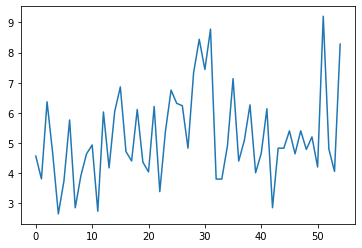

In [56]:
transcript_df['total_weight'].plot()

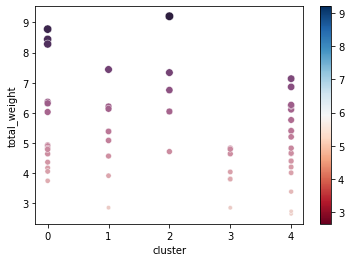

In [58]:
ax = sns.scatterplot(x="cluster", y="total_weight", data=transcript_df, hue="total_weight",size="total_weight")
norm = plt.Normalize(transcript_df['total_weight'].min(), transcript_df['total_weight'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)